<table align="left">
  <td>
    <a href="https://is.gd/Z5C7xc" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes Neuronales - Regresión Con Tensorflow

Un problema de regresión está enfocado en predecir un número asociado a un problema especifico. 

Por ejemplo, predecir el precio de una casa, predecir el precio de una acción, predecir la cantidad de ventas de un producto, etc.

Ejemplos:
- En cuanto será vendida una casa?
- Cuanto tiempo durará una batería?
- Cuantas personas comprarán un producto?
- Cuanto costará mi seguro medico?
- Cuanto debería guardar cada semana para gasolina?

En **deteccón de objetos**, la regresión es usada para predecir la posición de un objeto en la imagen y la clase del objeto. Por ejemplo, si queremos predecir la posición de un rostro en una imagen y la clase del rostro, la regresión nos dirá la posición de la esquina superior izquierda y la esquina inferior derecha del rostro y la clase del rostro.

> :book: En este notebook se abordaran los siguientes temas:

- Arquitectura de una red neuronal para regresión
- Shapes de entrada y salida de un modelo de regresión
- Crear datos personalizados para visualizar y entrenar un modelo de regresión
- Pasos en la creación de un modelo de regresión
    - Crear un modelo, 
    - Compilar el modelo,
    - Entrenar el modelo,
    - Evaluar el modelo,
- Diferentes metodos de evaluación de un modelo de regresión
- Salvar y cargar un modelo de regresión

[Referencia - Neural Network Regression with TensorFlow](https://is.gd/q7Ap79)

## Arquitectura de una red neuronal para regresión

En la primera imagen se observan los hiperparametros que conforman la arquitectura tipica de red neuronal. 

La segunda imagen muestra la arquitectura basica de una red neuronal para regresión.


<a href="https://ibb.co/g6wZHgF"><img src="https://i.ibb.co/SJ0wWv7/parametros-NN.png" alt="parametros-NN" border="0"></a>

<a href=""><img src="https://is.gd/HS4TNP" alt="NN" border="0"></a>

In [1]:
# importar TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Crear datos personalizados para visualizar y entrenar un modelo de regresión

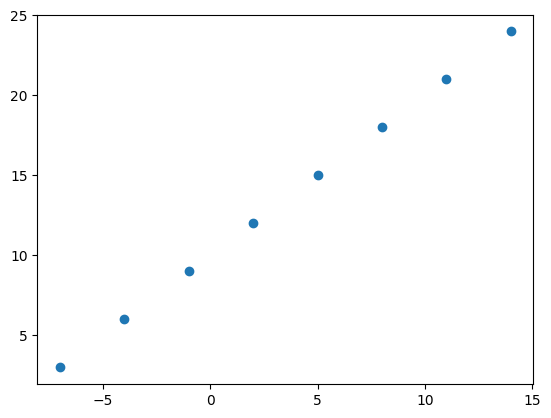

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# crear las características -
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# crear las etiquetas
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualizar los datos

plt.scatter(X, y)

## Shapes de entradas y salidas (X, y)



In [3]:
# Crear un tensor demo con las caracteristicas para predicción del problema del precio de la casa

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
X[0], y[0]

(-7.0, 3.0)

In [5]:
# shape de los datos creados
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Convertir los array de NumPy a tensores de TensorFlow

X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
# shape de los datos convertidos a tensores
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

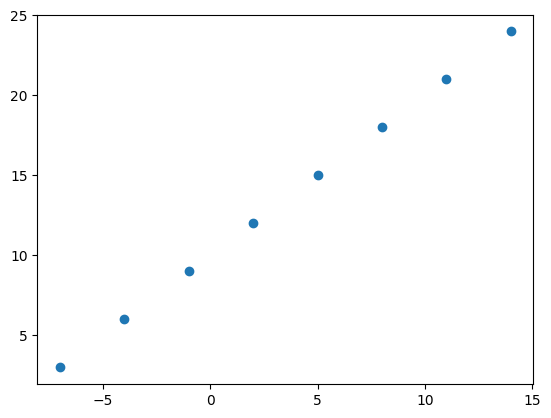

In [8]:
plt.scatter(X, y)

## Pasos para crear un modelo utilizando Tensorflow

1. **Crear un modelo** - Definir la arquitectura de la red neuronal: 
    - Capas de entrada
    - Capas ocultas
    - Capas de salida
2. **Compilar el modelo** - Definir la función de perdida, el optimizador y las métricas de evaluación. 
3. **Entrenar el modelo** - Ajustar el modelo a los datos de entrenamiento. (X,y) o (Features, Labels)

In [9]:
# Set the random seed
tf.random.set_seed(42)
# 1. Crear un modelo usando la API secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Entrenar el modelo
#history = model.fit(X, y, epochs=5)
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=10) # <- updated line

# 4. Evaluar el modelo
model.evaluate(X, y)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/10
1/1 [==============================] - 0s 95ms/step - loss: 10.1798 - mae: 10.1798


[10.179789543151855, 10.179789543151855]

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

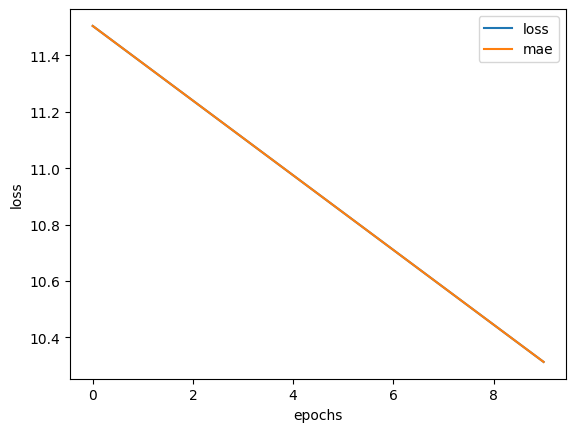

In [11]:
# Graficar el historico del entrenamiento del modelo 
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [12]:
# Recordemos los valores de X y y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Realizar una predicción con el modelo entrenado
# Para 17.0 el valor esperado es 27.0. El resultado de la evaluación del modelo muestra un error MAE de 10.18
# Por lo tanto la predicción del modelo presenta un error cercano al valor resultante del MAE. 

y_pred = model.predict([17.0])
y_pred

array([[15.741023]], dtype=float32)

## Mejorando el desempaño del modelo

Para mejorar el desempeño del modelo se pueden realizar las siguientes acciones:

- **Aumentar el número de neuronas en las capas ocultas** - Aumentar el número de neuronas en las capas ocultas puede ayudar a que el modelo aprenda patrones más complejos.
- **Aumentar el número de capas ocultas** - Aumentar el número de capas ocultas puede ayudar a que el modelo aprenda patrones más complejos.
- **Cambiar la función de activación** - Cambiar la función de activación puede ayudar a que el modelo aprenda patrones más complejos.
- **Cambiar el optimizador** - Cambiar el optimizador puede ayudar a que el modelo converja más rápido.
- **Aumentar el número de epochs** - Aumentar el número de epochs puede ayudar a que el modelo aprenda patrones más complejos.
- **Aumentar el tamaño del batch** - Aumentar el tamaño del batch puede ayudar a que el modelo aprenda patrones más complejos.
- **Aumentar el tamaño de los datos de entrenamiento** - Aumentar el tamaño de los datos de entrenamiento puede ayudar a que el modelo aprenda patrones más complejos.
- **Aumentar el tamaño de los datos de validación** - Aumentar el tamaño de los datos de validación puede ayudar a que el modelo aprenda patrones más complejos.
- **Aumentar el tamaño de los datos de prueba** - Aumentar el tamaño de los datos de prueba puede ayudar a que el modelo aprenda patrones más complejos.


### :lab_coat: Experimento 1. 

- Aumentar el número de epocas (epochs)

In [14]:
# 1. Crear un modelo
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4. Evaluar el modelo
model.evaluate(tf.expand_dims(X, axis=-1), y)

1/1 [==============================] - 0s 62ms/step - loss: 6.8813 - mae: 6.8813


[6.881250381469727, 6.881250381469727]

In [15]:
# Realizar una predicción con el modelo entrenado
# Para 17.0 el valor esperado es 27.0. El resultado de la evaluación del modelo muestra un error MAE de 6.88
# Por lo tanto la predicción del modelo presenta un error cercano al valor resultante del MAE. 

y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

### :lab_coat: Experimento 2. 

- Aumentar el número de capas ocultas
- Aumentar el número de neuronas en las capas ocultas

In [16]:
# 1. Crear un modelo
tf.keras.backend.clear_session()
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4. Evaluar el modelo
model.evaluate(tf.expand_dims(X, axis=-1), y)

1/1 [==============================] - 0s 68ms/step - loss: 4.9488 - mae: 4.9488


[4.948764801025391, 4.948764801025391]

### :lab_coat: Experimento 3. 

- Aumentar el número de capas ocultas
- Aumentar el número de neuronas en las capas ocultas
- Seleccionar una función de activación diferente - ReLU

In [17]:
# 1. Crear un modelo
tf.keras.backend.clear_session()
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4. Evaluar el modelo
model.evaluate(tf.expand_dims(X, axis=-1), y)

1/1 [==============================] - 0s 70ms/step - loss: 3.6933 - mae: 3.6933


[3.6933133602142334, 3.6933133602142334]

### :lab_coat: Experimento 4.

- Aumentar el número de capas ocultas
- Aumentar el número de neuronas en las capas ocultas
- Seleccionar una función de activación diferente - ReLU
- Cambiar el optimizador SGD a Adam con lr=0.01

In [18]:
# 1. Crear un modelo
tf.keras.backend.clear_session()
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4. Evaluar el modelo
model.evaluate(tf.expand_dims(X, axis=-1), y)

1/1 [==============================] - 0s 68ms/step - loss: 0.1605 - mae: 0.1605


[0.16051650047302246, 0.16051650047302246]

In [19]:
# Realizar una predicción con el modelo entrenado
# Para 17.0 el valor esperado es 27.0. El resultado de la evaluación del modelo muestra un error MAE de 0.16
# Por lo tanto la predicción del modelo presenta un error cercano al valor resultante del MAE. 

y_pred = model.predict([17.0])
y_pred

array([[27.217045]], dtype=float32)

### :lab_coat: Experimento 5.

- Aumentar el número de capas ocultas (3)
- Aumentar el número de neuronas en las capas ocultas
- Seleccionar una función de activación diferente - ReLU
- Cambiar el optimizador SGD a Adam con lr= 0.01

In [20]:
# 1. Crear un modelo
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4. Evaluar el modelo
model.evaluate(tf.expand_dims(X, axis=-1), y)

1/1 [==============================] - 0s 80ms/step - loss: 1.0925 - mae: 1.0925


[1.092536211013794, 1.092536211013794]

In [21]:
# Realizar una predicción con el modelo entrenado
# Para 17.0 el valor esperado es 27.0. El resultado de la evaluación del modelo muestra un error MAE de 6.88
# Por lo tanto la predicción del modelo presenta un error cercano al valor resultante del MAE. 

y_pred = model.predict([17.0])
y_pred

array([[24.910387]], dtype=float32)

## Evaluación del modelo

En practica, el workflow típico cuando se construye una red neuronal es:

```
Crear un modelo -> Compilar el modelo -> Entrenar el modelo -> Evaluar el modelo -> Ajustar el modelo 
Entrenar el modelo -> Evaluar el modelo -> Ajustar el modelo ...
```

> Cuando se evalua un modelo es importante la visualización de los resultados.

- Visualización de los datos de entrenamiento y validación
- Visualización de la estructura del modelo
- Visualización de los resultados de entrenamiento y validación
- Visualización de los resultados de prueba
- Visualización de las predicciones

In [22]:
# Crear un dataset mas grande

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [23]:
# Crear Labels para el dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

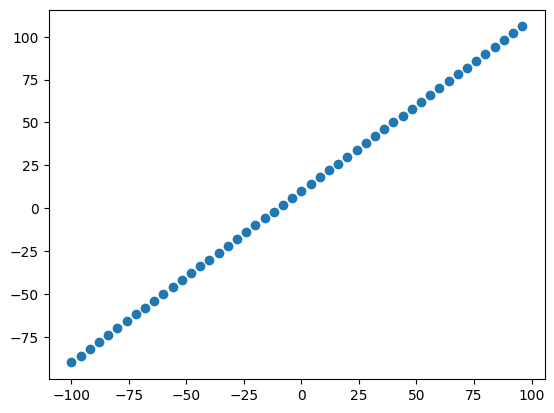

In [24]:
plt.scatter(X, y)

### Los 3 tipos de split de datos...

- **Entrenamiento** (Training Set) - El conjunto de datos que se utiliza para entrenar el modelo. Se asigna entre el 70 - 80% de los datos.
- **Validación** (Validation Set) - El conjunto de datos que se utiliza para evaluar el modelo durante el entrenamiento. Se asigna entre el 10 - 20% de los datos.
- **Prueba** (Test Set)- El conjunto de datos que se utiliza para evaluar el modelo después del entrenamiento. Se asigna entre el 10 - 20% de los datos.


In [25]:
len(X)

50

In [26]:
# Separar el dataset en train y test

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizar el dataset

Visualizar el dataset es una buena práctica para entender los datos y los patrones que se pueden encontrar en ellos.

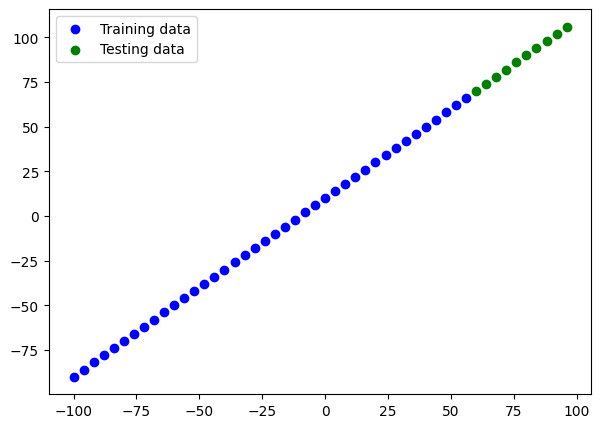

In [27]:
plt.figure(figsize=(7, 5))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')

# Show a legend
plt.legend();

In [28]:
# 1. Crear un modelo
tf.keras.backend.clear_session()

tf.random.set_seed(42)

# Es necesario definir el input_shape en la primera capa del modelo para que el modelo sepa que esperar de los datos de entrada. 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu', input_shape=[1], name = 'hidden_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer')
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 50)                100       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


* Total params - Número total de parámetros del modelo.
* Trainable params - Número de parámetros que se pueden actualizar durante el entrenamiento.
* Non-trainable params - Número de parámetros que no se pueden actualizar durante el entrenamiento. (Se utiliza comumente para transfer learning).

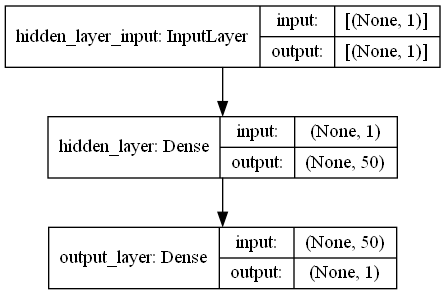

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)


In [31]:
# 3. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, verbose = 0)

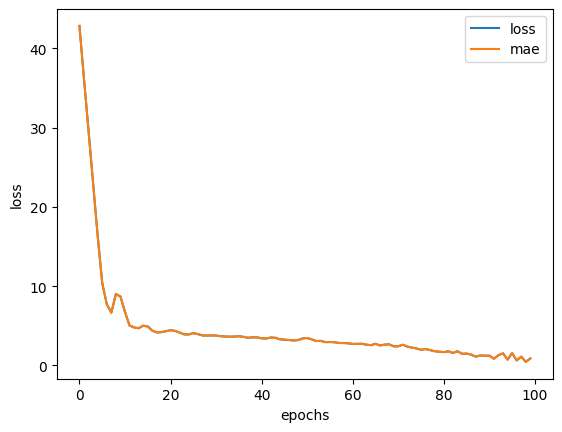

In [32]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### Visualizar las predicciones del modelo

In [33]:
# Realizar una predicción con el modelo entrenado
y_pred = model.predict(X_test)

In [34]:
# Crear una función para visualizar los resultados de la predicción

def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_pred):
    plt.figure(figsize=(7, 5))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')

    # Plot the model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    # Show a legend
    plt.legend();

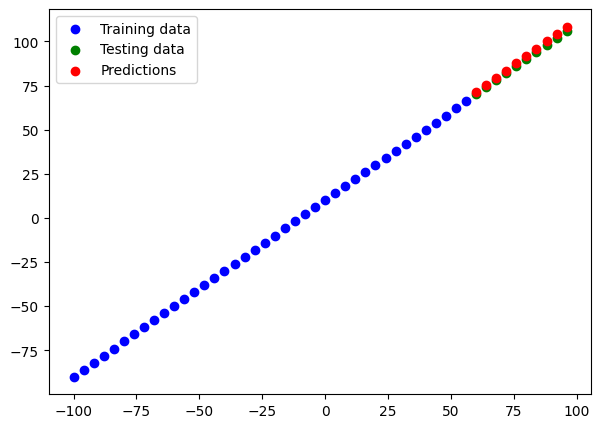

In [35]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

## Evaluación de las predicciones

Dependiendo del problema que se este resolviendo, se puede utilizar una métrica de evaluación diferente.

Dado que estamos trabajando con regresión, las métricas de evaluación que se pueden utilizar son:

- **Mean Absolute Error (MAE)** - Es la media del valor absoluto de los errores. Es la métrica más fácil de entender, ya que es el error promedio.
- **Mean Squared Error (MSE)** - Es la media de los errores al cuadrado. MSE es más popular que MAE, ya que MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.
- **Root Mean Squared Error (RMSE)** - Es la raíz cuadrada de la media de los errores al cuadrado. Es interpretable en las mismas unidades que los objetivos.
- **Huber** - Es similar a MSE, pero no es tan sensible a los errores extremos en los datos.

<a href=""><img src="https://tinyurl.com/2mk4al2n" alt="metrics" border="0"></a>
<a href="https://ibb.co/b3pMH2W"><img src="https://i.ibb.co/j57PVW6/imagen-2022-12-03-215713895.png" alt="imagen-2022-12-03-215713895" border="0"></a>


In [36]:
# 4. Evaluar el modelo
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 73ms/step - loss: 1.6859 - mae: 1.6859


[1.685888648033142, 1.685888648033142]

In [37]:
# El tensor y_pred tiene una dimension extra. Por lo tanto para compararlos es necesario que ambos tengan la misma dimension.
# Para ello se utiliza la función squeeze() que elimina las dimensiones de tamaño 1 de un tensor.
tf.constant(y_pred), y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 71.16125 ],
        [ 75.265205],
        [ 79.369156],
        [ 83.47312 ],
        [ 87.590416],
        [ 91.72693 ],
        [ 95.86344 ],
        [ 99.99995 ],
        [104.13645 ],
        [108.27297 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [38]:
# Calcular el Mean Squared Error (MSE) y el Mean Absolute Error (MAE)

mae = tf.metrics.mean_absolute_error(y_true =y_test, y_pred = tf.squeeze(y_pred))
mse = tf.metrics.mean_squared_error(y_true =y_test, y_pred = tf.squeeze(y_pred))
mae.numpy(), mse.numpy()

(1.6858886, 2.9708648)

In [39]:
# Calcular el Mean Squared Error (MSE) y el Mean Absolute Error (MAE) con la función mean_absolute_error() y mean_squared_error() de sklearn

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae, mse

(1.685888671875, 2.9708649373846128)

## Realizar Experimentos para mejorar el modelo

- model_1 - mismo que el original, 1 capa, entrenado con 100 epocas.
- model_2 - 2 capas, entrenado con 100 epocas.
- model_3 - 2 capas, entrenado con 500 epocas.

### :lab_coat: Experimento 1. 

- model_1 - mismo que el original, 1 capa, entrenado con 100 epocas.

In [40]:
tf.random.set_seed(42)

# 1. Crear un modelo
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(1, name = 'output_layer')
])

# 2. Compilar el modelo
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model_1.fit(X_train, y_train, epochs=100, verbose = 0)

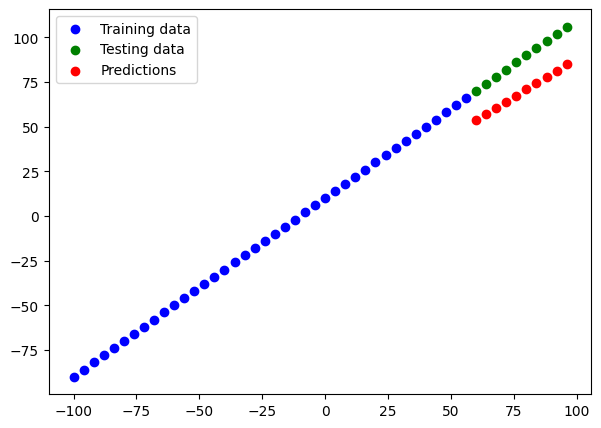

In [41]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [42]:
mae_1 = tf.metrics.mean_absolute_error(y_true =y_test, y_pred = tf.squeeze(y_preds_1)).numpy()
mse_1 = tf.metrics.mean_squared_error(y_true =y_test, y_pred = tf.squeeze(y_preds_1)).numpy()
mae_1, mse_1

(18.745327, 353.5734)

### :lab_coat: Experimento 2. 

- model_2 - 2 capas, entrenado con 100 epocas.

In [43]:
tf.random.set_seed(42)

# 1. Crear un modelo
model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation = 'relu', name = 'hidden_layer'),
        tf.keras.layers.Dense(1, name = 'output_layer')
])

# 2. Compilar el modelo
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

# 3. Entrenar el modelo

history = model_2.fit(X_train, y_train, epochs=100, verbose = 0)

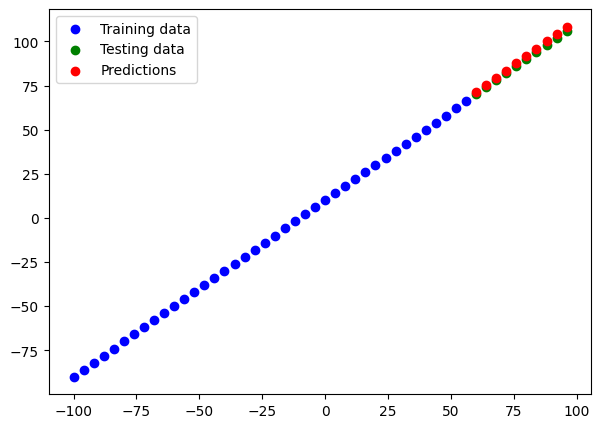

In [44]:
# Make and plot predictions for model_1
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [45]:
# metricas del modelo 2 mae, mse

mae_2 = tf.metrics.mean_absolute_error(y_true =y_test, y_pred = tf.squeeze(y_preds_2)).numpy()
mse_2 = tf.metrics.mean_squared_error(y_true =y_test, y_pred = tf.squeeze(y_preds_2)).numpy()
mae_2, mse_2

(1.6858886, 2.9708648)

### :lab_coat: Experimento 3. 

- model_3 - 2 capas, entrenado con 500 epocas.

In [46]:
tf.random.set_seed(42)

# 1. Crear un modelo
model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation = 'relu', name = 'hidden_layer'),
        tf.keras.layers.Dense(50, activation = 'relu', name = 'hidden_layer_2'),
        tf.keras.layers.Dense(1, name = 'output_layer')
])

# 2. Compilar el modelo

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

# 3. Entrenar el modelo

history = model_3.fit(X_train, y_train, epochs=500, verbose = 0)

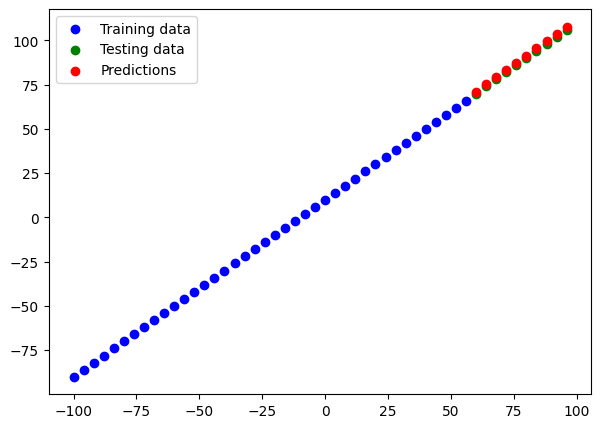

In [47]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [48]:
# metricas del modelo 3 mae, mse

mae_3 = tf.metrics.mean_absolute_error(y_true =y_test, y_pred = tf.squeeze(y_preds_3)).numpy()
mse_3 = tf.metrics.mean_squared_error(y_true =y_test, y_pred = tf.squeeze(y_preds_3)).numpy()
mae_3, mse_3

(1.3827317, 1.9535267)

### Comparar los resultados de los modelos

In [49]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [50]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,1.685889,2.970865
2,model_3,1.382732,1.382732


## Guardar y cargar un modelo

Guardar un modelo nos permite utilizarlo en un futuro sin tener que volver a entrenarlo, o compartirlo con otras personas. Adicionalmente, guardar un modelo nos permite continuar el entrenamiento desde donde lo dejamos, en caso de que el entrenamiento se interrumpa.

Hay dos formatos principales para guardar modelos:

- **El formato SavedModel** - Es el formato predeterminado de TensorFlow. Guarda un modelo como un conjunto de archivos que contiene el peso y la configuración del modelo.

- **El formato HDF5** - Es un formato de archivo de alto nivel que almacena un modelo permitiendo que el modelo completo se guarde en un solo archivo. El formato HDF5 es compatible con casi cualquier lenguaje de programación. Si bien es útil, el formato HDF5 no es compatible con TensorFlow.js, por lo que si desea utilizar su modelo en un navegador, debe usar el formato SavedModel. 

In [51]:
# Guardar el modelo utilizando el formato SavedModel
model_3.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [52]:
# Guardar el modelo utilizando el formato HDF5

model_3.save("best_model_HDF5_format.h5")

In [53]:
# Cargar el modelo guardado en formato SavedModel
loaded_savedmodel_format = tf.keras.models.load_model("best_model_SavedModel_format")

In [54]:
# Probar el modelo cargado
loaded_savedmodel_format.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 50)                100       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 50)                2550      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Cargar el modelo guardado en formato HDF5
loaded_hdf5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")

In [56]:
loaded_hdf5_format.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 50)                100       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 50)                2550      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Comparar las predicciones de los dos modelos cargados

loaded_savedmodel_format_preds = loaded_savedmodel_format.predict(X_test)
loaded_hdf5_format_preds = loaded_hdf5_format.predict(X_test)

loaded_savedmodel_format_preds == loaded_hdf5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Ejemplo mas complejo

Se realizara un ejemplo con el dataset Medical Cost Personal Datasets, el cual contiene información de 1338 pacientes, con 7 variables independientes y 1 variable dependiente.

El objetivo es predecir el costo de los seguros de salud de los pacientes, basandose en un número de parámetros como edad, sexo, IMC, numero de hijos, si fuma o no, region donde vive, etc.

- age, 
- sex, 
- bmi, 
- children, 
- smoking_status
- residential_region.

El dataset Medical Cost se encuentra disponible [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance) y [GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

In [58]:
# importar las librerias necesarias
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [60]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Analisis de datos Exploratorio
El análisis exploratorio de datos es el proceso de análisis y visualización de las variables de un conjunto de datos. Este paso no es necesario para la codificación de características, pero es util analizar los datos antes de realizar cualquier aprendizaje automático.

### Charges by Age

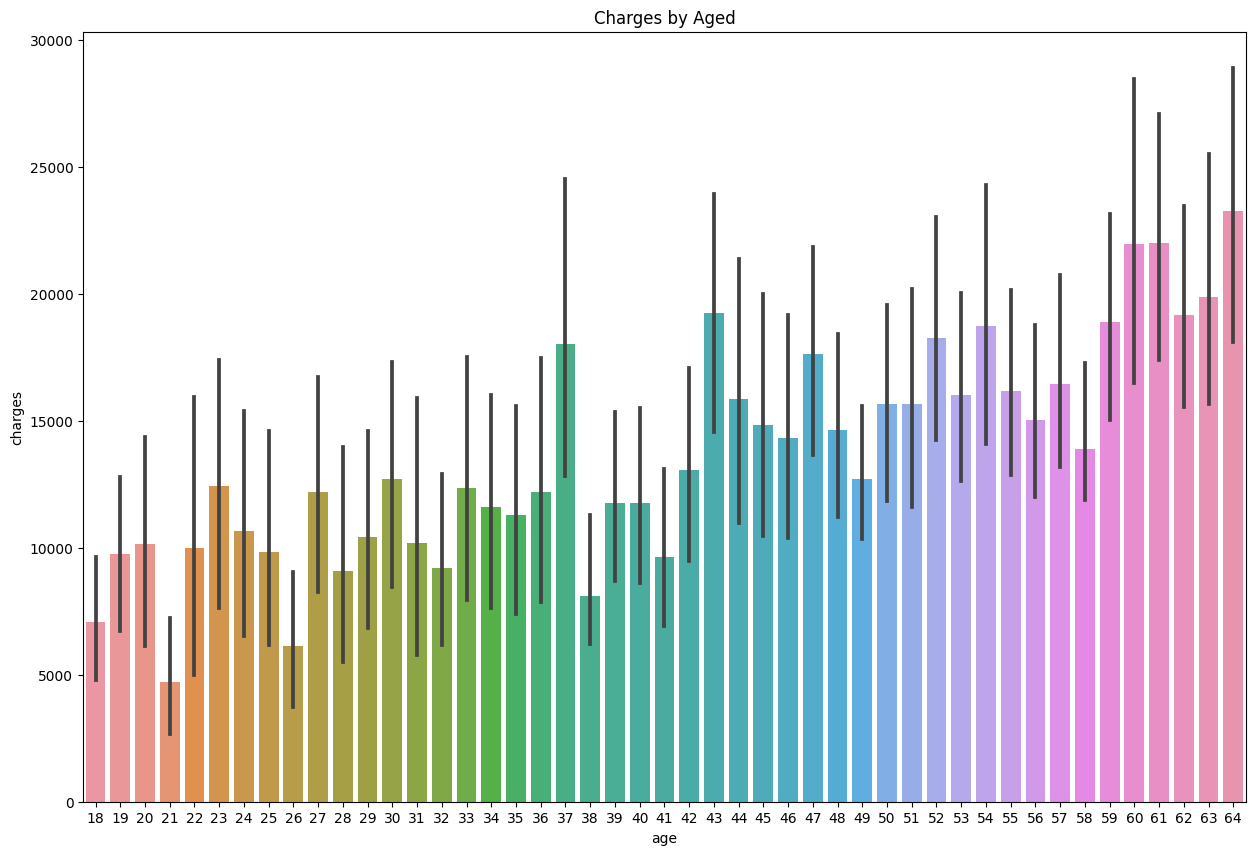

In [63]:
insurance[['age', 'charges']].groupby('age', as_index = False).mean().sort_values(by = 'charges', ascending = False, ignore_index = True)

# Graficar la relacion entre edad y cargos
plt.figure(figsize = (15, 10))
sns.barplot(x = 'age', y = 'charges', data = insurance)
plt.title('Charges by Aged');

### Charges by Gender(Sex)

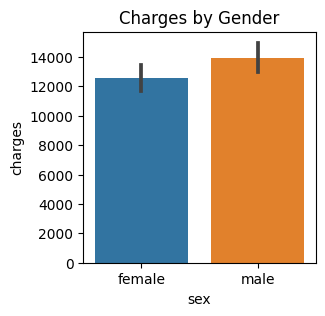

In [64]:
insurance[['sex', 'charges']].groupby('sex', as_index = False).mean().sort_values(by = 'charges', ascending = False, ignore_index = True)

# Graficar la relacion entre sexo y cargos
plt.figure(figsize = (3, 3))
sns.barplot(x = 'sex', y = 'charges', data = insurance)
plt.title('Charges by Gender');

### Charges by Children

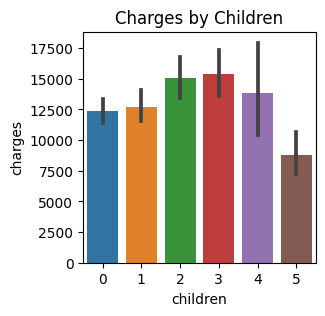

In [65]:
insurance[['children', 'charges']].groupby('children', as_index = False).mean().sort_values(by = 'charges', ascending = False, ignore_index = True)

# Graficar la relacion entre Hijos y cargos
plt.figure(figsize = (3, 3))
sns.barplot(x = 'children', y = 'charges', data = insurance)
plt.title('Charges by Children');

### Charges if Smoker

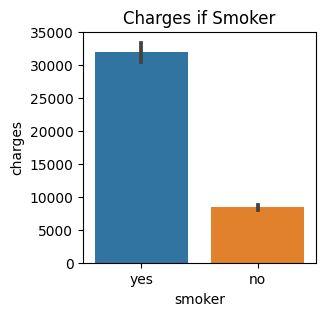

In [66]:
insurance[['smoker', 'charges']].groupby('smoker', as_index = False).mean().sort_values(by = 'charges', ascending = False, ignore_index = True)
# Graficar la relacion entre fumador y cargos
plt.figure(figsize = (3, 3))
sns.barplot(x = 'smoker', y = 'charges', data = insurance)
plt.title('Charges if Smoker');

### Charges by Region

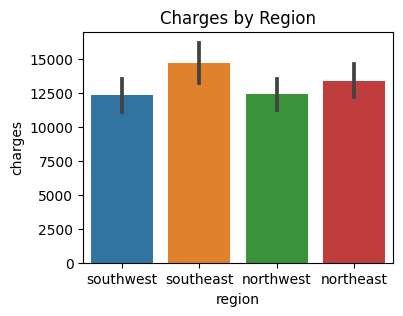

In [67]:
insurance[['region', 'charges']].groupby('region', as_index = False).mean().sort_values(by = 'charges', ascending = False, ignore_index = True)
# Graficar la relacion entre region y cargos
plt.figure(figsize = (4, 3))
sns.barplot(x = 'region', y = 'charges', data = insurance)
plt.title('Charges by Region');

### Variable Objetivo

In [68]:
# charges summary statistics
insurance['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

<Figure size 800x500 with 0 Axes>

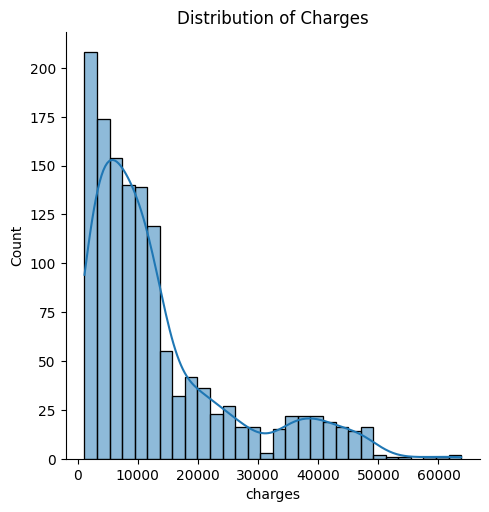

In [69]:
# Distribution of charges (target variable)
plt.figure(figsize = (8, 5))
sns.displot(insurance['charges'], kde = True)
plt.title('Distribution of Charges');

### Codificación de características

Ahora que hemos explorado por completo las variables del conjunto de datos, podemos pasar a obtener la lectura del conjunto de datos para su modelización.

Más concretamente, queremos convertir los datos categóricos de nuestro conjunto de datos en datos numéricos. Este proceso se conoce como codificación de características.

Pero antes de sumergirnos en la codificación de características, es importante que primero contrastemos la diferencia entre una variable nominal y una variable ordinal. Esto es para que podamos hacer coincidir el codificador correcto con la variable correcta.

**La variable nominal** es una variable categórica cuyos datos no tienen un orden lógico. Algunos ejemplos de datos nominales son

- Hombre y mujer
- Ubicación A, ubicación B y ubicación C

**La variable ordinal**, por otro lado, también es una variable categórica pero sus datos siguen un orden lógico. Algunos ejemplos de datos ordinales son:

- Pequeño, mediano y grande
- Malo, neutro y bueno
- Niños, adultos y ancianos
- Ingresos bajos, medios y altos

Como veremos en esta sección, las variables nominales se codifican con **OneHotEncoder**.

### Codificación de las variables nominales

**Variables nominales/categoricas** del conjunto de datos:

- sex
- smoker
- region

Las variables **age, bmi y children** son variables numéricas, por lo que no necesitamos codificarlas.

In [70]:
# Aplicar OneHotEncoding a las variables categoricas utilizando pandas get_dummies
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [71]:
# Crear X e y de los datos
X_full = insurance_one_hot.drop('charges', axis = 1)
y_full = insurance_one_hot['charges']

X_full.shape, y_full.shape

((1338, 11), (1338,))

In [72]:
# Dividir los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1070, 11)
y_train shape:  (1070,)
X_test shape:  (268, 11)
y_test shape:  (268,)


### :lab_coat: Experimento 1.

- model_charges: 
    - 2 capas ocultas con 50 neuronas cada una,
    - Función de activación: relu, 
    - entrenado con 500 epocas.
    - optimizer: SGD


In [85]:
# Crear un modelo de red neuronal para predecir los cargos
tf.random.set_seed(42)

# 1. Crear el modelo
model_charges = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu', input_shape = [X_train.shape[1]]),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model_charges.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

# 3. Ajustar el modelo
history = model_charges.fit(X_train, y_train, epochs = 500, validation_data=(X_test, y_test),  verbose = 0)

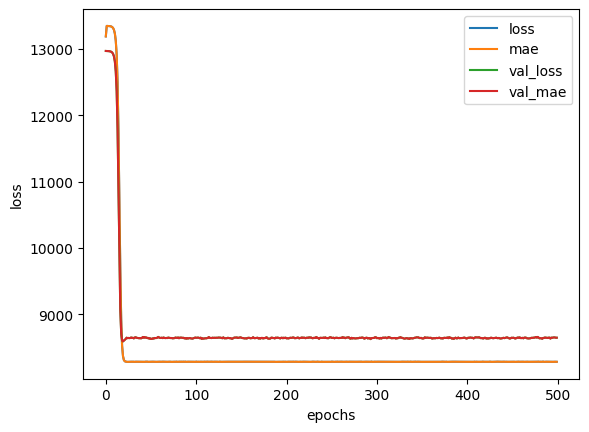

In [86]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [87]:
# Evaluar el modelo
model_charges.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8646.2637 - mae: 8646.2637


[8646.263671875, 8646.263671875]

In [88]:
# Realizar una predicción con el modelo entrenado
y_pred = model_charges.predict(X_test)

In [89]:
# metricas del modelo 3 mae, mse

mae = tf.metrics.mean_absolute_error(y_test, y_pred = tf.squeeze(y_pred)).numpy()
mse = tf.metrics.mean_squared_error(y_test, y_pred = tf.squeeze(y_pred)).numpy()
mae, mse

(8646.264, 166483520.0)

### :lab_coat: Experimento 2.

- model_charges: 
    - 3 capas ocultas con 100, 50, 10 neuronas cada una,
    - Función de activación: relu, 
    - entrenado con 500 epocas.
    - optimizer: Adam

In [90]:
# Crear un modelo de red neuronal para predecir los cargos
tf.random.set_seed(42)

# 1. Crear el modelo
model_charges_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', input_shape = [X_train.shape[1]]),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model_charges_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# 3. Ajustar el modelo
history = model_charges_2.fit(X_train, y_train, epochs = 500, validation_data=(X_test, y_test),  verbose = 0)

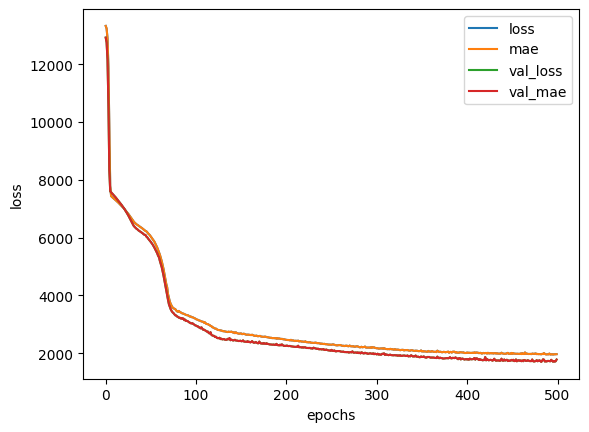

In [91]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [92]:
# Evaluar el modelo
model_charges_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1777.8649 - mae: 1777.8649


[1777.8648681640625, 1777.8648681640625]

In [93]:
# Realizar una predicción con el modelo entrenado
y_pred_2 = model_charges_2.predict(X_test)

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_2 = mean_absolute_error(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
mae_2, mse_2

(1777.86492655804, 20488125.42098658)

### :lab_coat: Experimento 3.

Para este experimento se normalizaran las variables numericas, para que todas las variables tengan el mismo rango de valores. Y se utilizaran las variables categoricas codificadas con OneHotEncoder utilizando sklearn.

- model_charges: 
    - 3 capas ocultas con 100, 50, 10 neuronas cada una,
    - Función de activación: relu, 
    - entrenado con 500 epocas.
    - optimizer: Adam

In [97]:
insurance_2 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Codificar y normalizar las variables del dataset

build a multi-step data preprocessing function for the folllowing transformations
- [**make_column_transformer**](https://tinyurl.com/2ncbdpf3) - construye una función de transformación de columnas que aplica transformaciones a columnas específicas de un conjunto de datos.:

    - [**MinMaxScaler**](https://tinyurl.com/y398bgxa): Transforma las variables para que todas tengan el mismo rango de valores, en este caso de 0 a 1.
    - [**OneHotEncoder**](https://tinyurl.com/ru24drn): Codifica las variables categoricas en variables numericas.

In [102]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance_2.drop("charges", axis=1)
y = insurance_2["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [103]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [104]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [105]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [107]:
# Crear un modelo de red neuronal para predecir los cargos
tf.random.set_seed(42)

# 1. Crear el modelo
model_charges_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', input_shape = [X_train_normal.shape[1]]),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model_charges_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

# 3. Ajustar el modelo
history = model_charges_3.fit(X_train_normal, y_train, epochs = 500, validation_data=(X_test_normal, y_test),  verbose = 0)

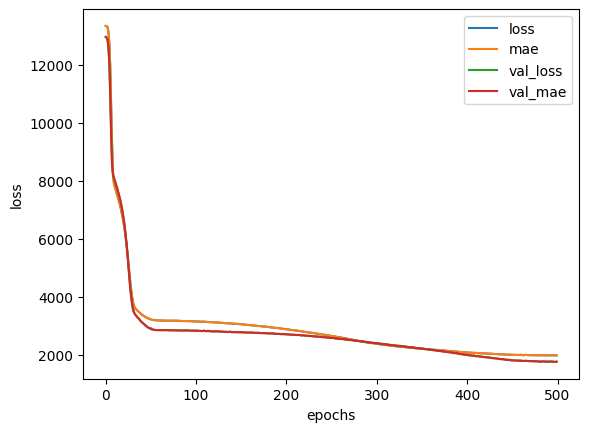

In [108]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [109]:
# Evaluar el modelo
model_charges_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1761.8066 - mae: 1761.8066


[1761.806640625, 1761.806640625]

In [112]:
# Realizar una predicción con el modelo entrenado
y_pred_3 = model_charges_3.predict(X_test_normal)

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_3 = mean_absolute_error(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)
mae_3, mse_3

(1761.8066549927705, 20992424.05090817)